In [1]:
import csv
import re
import pandas as pd
import numpy as np
import math
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.stats import sigma_clip
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import matplotlib.cm as cm
import scipy.misc
import scipy.stats as sta
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval,LinearStretch,ImageNormalize
get_ipython().magic('matplotlib inline')
import plotly.graph_objects as go
import plotly

In [2]:
def gauss(x_i,y_i,x_j,y_j,sigma):
    distance=(x_i-x_j)**2+(y_i-y_j)**2
    k=math.exp(-(distance/(2*(sigma**2))))
    return k

In [3]:
x=[220.1147583, 220.1940986, 219.95405970000002, 220.12725730000002, 220.0975256, 220.2511312, 220.1426165, 219.88191980000002, 220.34714350000002, 219.98201119999996, 220.40354100000002, 220.301227, 220.1765735, 220.5275534, 220.17371239999997, 220.15737599999997, 220.55477319999997, 219.9495898, 220.31627680000003, 220.05614790000004, 220.55142, 220.23912760000002, 219.9465641, 220.245292, 219.8787434, 219.9529071, 220.6213401, 219.95549019999999, 220.4941005, 220.0833008, 220.6223921, 220.045316, 219.9418469, 220.6034809, 220.46813050000003, 220.226003, 220.3780741, 220.47920589999998, 219.9877796, 220.33497590000002, 220.3125537, 220.27013190000002, 220.27044249999997, 220.51570499999997, 220.20498840000002, 220.21089819999997, 219.8891106, 220.0047211, 220.0457999, 220.39486580000002, 220.26287280000003, 220.2982912, 220.04670860000002, 220.4327537, 219.96814559999999, 220.0564389, 220.31370809999999, 220.10595330000004, 220.1211494, 220.5446369, 220.3664565, 220.05349089999999, 220.51549419999998, 220.4757939, 220.3568905, 220.40869849999999, 220.36658959999997, 220.27905800000002, 220.21121890000003, 220.3905883, 220.54422160000001, 220.4168114, 220.5181696, 220.35248419999996, 220.53779849999998, 220.53887749999998, 220.340261, 220.42056569999997, 220.35412230000003, 220.4369988, 219.86693599999998, 219.95385640000003, 220.3553499, 219.887345, 220.3514241, 220.56058419999997, 220.5622213, 220.5702653, 220.060531, 220.48326150000003, 220.44174049999998, 219.8894754, 220.1650595, 219.9048308, 220.3201984, 220.4920139, 220.3844037, 220.62798880000003, 220.1284333, 219.94202280000002, 219.99957949999998, 220.3541687, 220.31213390000002, 219.8797202, 220.0411724, 220.1226153, 220.06929330000003, 220.14171290000002, 220.116367, 220.05440099999998, 220.5589239]

In [4]:
y=[39.733088200000005, 39.7409774, 39.736879200000004, 39.745628499999995, 39.7466484, 39.754393900000004, 39.7584481, 39.7598901, 39.762350899999994, 39.773351899999994, 39.784730200000006, 39.7842032, 39.787654100000005, 39.7919394, 39.7884747, 39.803094, 39.8140685, 39.8205217, 39.8201211, 39.833158000000005, 39.8341671, 39.8309973, 39.8362098, 39.850674600000005, 39.85276270000001, 39.8497565, 39.85847879999999, 39.8574439, 39.861199400000004, 39.860670899999995, 39.8675617, 39.874709100000004, 39.8745677, 39.879886799999994, 39.8825758, 39.8810705, 39.8849884, 39.886927299999996, 39.8948241, 39.898672, 39.9034615, 39.9007162, 39.9056098, 39.905727, 39.9021467, 39.917260799999994, 39.9172995, 39.9264204, 39.941077500000006, 39.945316, 39.949068, 39.94873320000001, 39.950523700000005, 39.9534458, 39.9525336, 39.956584899999996, 39.9784533, 39.978492100000004, 39.993846600000005, 39.99433629999999, 40.000722499999995, 40.001642, 39.9852448, 40.007843900000005, 40.01387020000001, 40.018993200000004, 40.0196697, 40.0167506, 40.035044899999995, 40.0286546, 40.040434999999995, 40.041645, 40.0467751, 40.047358, 40.0468845, 40.0497032, 40.049765, 40.0515523, 40.056845200000005, 40.0574898, 40.05846029999999, 40.0586505, 40.0655394, 40.0653162, 40.0529255, 40.0663105, 40.0664446, 40.069187799999995, 40.0696334, 40.08655220000001, 40.0884641, 40.0930634, 40.100388200000005, 40.0989997, 40.107626399999994, 40.113753, 40.110045, 40.1194771, 40.1182324, 40.16346970000001, 40.165539100000004, 40.1718823, 40.1742415, 40.1773152, 40.182285, 40.1908799, 40.19295220000001, 40.1981134, 40.1966816, 40.2093841, 40.220414]

In [5]:
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

In [6]:
coeff=(xmax-xmin)*(ymax-ymin)*36

In [7]:
xx, yy = np.mgrid[xmin:xmax:10j, ymin:ymax:10j]

In [8]:
deltax=(xmax-xmin)/10
deltay=(ymax-ymin)/10

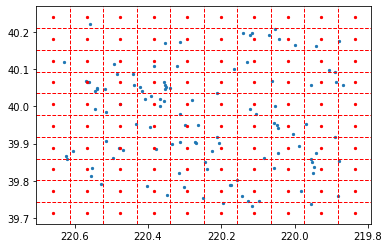

In [9]:
plt.scatter(x,y,s=5)
plt.axis([xmax,xmin,ymin,ymax])
xgrid_centre=[]
ygrid_centre=[]

for i in range(10):
    plt.axhline(ymin+i*deltay, color='r', linestyle='--', linewidth = 1)
    plt.axvline(xmin+i*deltax, color='r', linestyle='--', linewidth = 1)
    ygrid_centre.append(ymax-(i+1)*deltay+0.5*deltay)
    xgrid_centre.append(xmax-(i+1)*deltax+0.5*deltax)

for i in range(len(xgrid_centre)):
    for j in range(len(ygrid_centre)):
        plt.scatter(xgrid_centre[i],ygrid_centre[j],s=5,c='r')

In [10]:
kernel = np.zeros((10,10))

In [11]:
belong_grid_x=[]
belong_grid_y=[]
for i in range(len(x)):
    distance=np.zeros((10,10))
    for j in range(len(ygrid_centre)):
        for k in range(len(xgrid_centre)):
            distance[j][k]=((x[i]-xgrid_centre[k])**2+(y[i]-ygrid_centre[j])**2)
    c=np.argmin(distance)
    belong_grid_y.append(c//10)
    belong_grid_x.append(c%10)
    kernel[belong_grid_y[i]][9-belong_grid_x[i]]=kernel[belong_grid_y[i]][9-belong_grid_x[i]]+1

In [12]:
print(kernel)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 3. 4. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
 [1. 3. 1. 0. 0. 0. 7. 4. 6. 0.]
 [0. 0. 1. 2. 1. 2. 5. 2. 1. 0.]
 [0. 1. 4. 0. 0. 2. 1. 1. 0. 0.]
 [0. 2. 2. 1. 3. 4. 1. 4. 1. 1.]
 [1. 4. 1. 0. 3. 1. 0. 0. 2. 1.]
 [1. 0. 1. 3. 2. 2. 2. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]]


In [13]:
for i in range(10):
    for j in range(10):
        kernel[i][j]=kernel[i][j]/coeff

In [14]:
print(kernel)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.05201167 0.        ]
 [0.05201167 0.05201167 0.15603502 0.20804669 0.         0.05201167
  0.05201167 0.         0.         0.        ]
 [0.         0.05201167 0.         0.05201167 0.05201167 0.05201167
  0.05201167 0.05201167 0.         0.05201167]
 [0.05201167 0.15603502 0.05201167 0.         0.         0.
  0.3640817  0.20804669 0.31207003 0.        ]
 [0.         0.         0.05201167 0.10402334 0.05201167 0.10402334
  0.26005836 0.10402334 0.05201167 0.        ]
 [0.         0.05201167 0.20804669 0.         0.         0.10402334
  0.05201167 0.05201167 0.         0.        ]
 [0.         0.10402334 0.10402334 0.05201167 0.15603502 0.20804669
  0.05201167 0.20804669 0.05201167 0.05201167]
 [0.05201167 0.20804669 0.05201167 0.         0.15603502 0.05201167
  0.         0.         0.10402334 0.05201167]
 [0.05201167 0.         0.05201167 0.15603502 0.10402334 0.10402334
  0.10402334 0.         0.05

In [15]:
y_g=[]
x_g=[]
value_g=[]

for i in range(len(kernel)):
    for j in range(len(kernel[i])):
        if kernel[i][j]!=0:
            x_g.append(xgrid_centre[j])
            y_g.append(ygrid_centre[i])
            value_g.append(kernel[i][j])
            

In [16]:
def optimal_sigma(sigma1):
    probability=[]
    pro=1
    for i in range(len(x_g)):
        pro_sum=0
        for j in range(len(x_g)):
            if i!=j:
                #pro_sum=pro_sum+((1/(sigma1*math.sqrt(2*math.pi)))*gauss(x[i],y[i],x[j],y[j],sigma1))
                #pro_sum=pro_sum+((1/(sigma1*math.sqrt(2*math.pi)))*gauss(x[i]*60,y[i]*60,x[j]*60,y[j]*60,sigma1))
                pro_sum=pro_sum+((1/((sigma1**2)*2*math.pi))*gauss(x[i]*60,y[i]*60,x[j]*60,y[j]*60,sigma1))
                
        probability.append(pro_sum)
        
    for i in range(len(probability)):
        pro=pro*probability[i]
    return pro

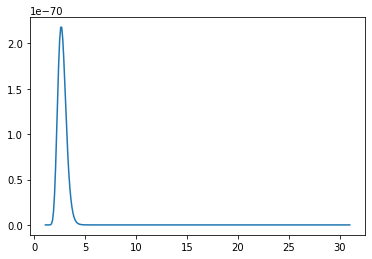

In [17]:
sigma_x=[]
origin=1
for i in range(300):
    #sigma_x.append((i+1)*0.1+origin)
    sigma_x.append((i+1)*0.1+origin)

likelihood=[]
for i in range(len(sigma_x)):
    likelihood.append(optimal_sigma(sigma_x[i]))



plt.plot(sigma_x,likelihood)

In [18]:
a=likelihood.index(max(likelihood))
print(sigma_x[a])

2.6


In [19]:
kernel2= np.zeros((10,10))

for i in range(len(x_g)):
    kernel1 = np.zeros((10,10))
    sum=0
    for j in range(len(kernel1)):
        for k in range(10):
            #kernel1[j][k]=gauss(xgrid_centre[k],ygrid_centre[j],x_g[i],y_g[i],1.1)#sigma
            kernel1[j][k]=gauss(xgrid_centre[k]*60,ygrid_centre[j]*60,x_g[i]*60,y_g[i]*60,2.6)#sigma
            #sum=sum+kernel1[j][k]
    for j in range(len(kernel1)):
        for k in range(10):
            #kernel1[j][k]=value_g[i]*kernel1[j][k]/sum
            #kernel1[j][k]=value_g[i]*kernel1[j][k]*(1/(math.sqrt(2*math.pi)*2.6))#sigma
            kernel1[j][k]=value_g[i]*kernel1[j][k]*(1/(2*math.pi*2.6*2.6))#sigma
            kernel2[j][k]=kernel2[j][k]+kernel1[j][k]
'''
for i in range(len(kernel2)):
    for j in range(10):
         kernel2[j][k]=(kernel2[j][k])
'''

'\nfor i in range(len(kernel2)):\n    for j in range(10):\n         kernel2[j][k]=(kernel2[j][k])\n'

In [20]:
ra_final=[220.31627680000003, 220.23912760000002, 220.27013190000002, 220.20498840000002, 220.27905800000002, 220.3905883, 220.340261, 220.3514241, 220.3844037, 220.116367]
dec_final=[39.8201211, 39.8309973, 39.9007162, 39.9021467, 40.0167506, 40.0286546, 40.049765, 40.0529255, 40.110045, 40.1966816]

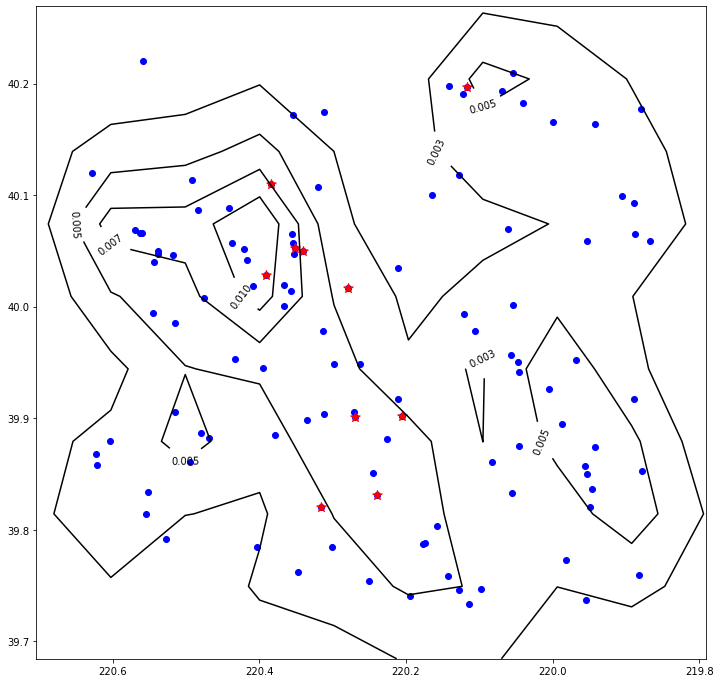

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
cset = ax.contour(xx, yy, np.rot90(kernel2,-1), 5,colors='black')
#cset = ax.contour(xx, yy, kernel, colors='black')
ax.clabel(cset, inline=1, fontsize=10)
#ax.imshow(kernel2,extent=[xmin, xmax, ymin, ymax])
#ax.imshow(np.rot90(kernel),extent=[xmin, xmax, ymin, ymax])
ax.scatter(x,y,c='b')
plt.axis([xmax,xmin,ymin,ymax])
'''
for i in range(10):
    plt.axhline(ymin+i*deltay, color='r', linestyle='--', linewidth = 1)
    plt.axvline(xmin+i*deltax, color='r', linestyle='--', linewidth = 1)
'''

ax.scatter(ra_final,dec_final, c='r', s=100, marker='*')